# Multi-Class Classification using k-Nearest-Neighbors (k-NN)

k-Nearest-Neighbors (kNN) is a simple technique for classification. The idea behind
it is that similar data points should have the same class, at least most of the time.
This method is very intuitive and has proven itself in many domains including
recommendation systems, anomaly detection, image/text classification and more.

In what follows we present a detailed example of a multi-class classification objective. We are going to use the [GTZAN dataset which is the most-used public dataset](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification?select=Data) for evaluation in machine listening research for music genre recognition (MGR). 

The files were collected in 2000-2001 from a variety of sources including personal CDs, radio, microphone recordings, in order to represent a variety of [recording conditions](http://marsyas.info/downloads/datasets.html).

The machine learning task is to predict the genre of the music. 

The dataset contains features of the audio files. One file has for each song (30 seconds long) a mean and variance computed over multiple features that can be extracted from an audio file. The other file has the same structure, but the songs were split before into 3 seconds audio files (this way increasing 10 times the amount of data we fuel into our classification models). With data, more is always better.


This notebook was tested in Amazon Notebook instance and Amazon SageMaker Studio on a ml.t3.medium instance with Python 3 (Data Science) kernel.


# Importing the `lib` 

In [ ]:
#!pip install librosa

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the Dataset - `Audio` (format `.wav`)

<img src="img/img5.png" alt="Alternative text" />


In [3]:
DATASET_PATH = 'dataset/audio_format'
print(list(os.listdir(f'{DATASET_PATH}')))

['pop', 'reggae', 'disco', 'country', 'metal', 'blues', 'jazz', '.ipynb_checkpoints', 'classical', 'rock', 'hiphop']


In [4]:
vector, frequency = librosa.load(f'{DATASET_PATH}/blues/blues.00000.wav')

print(f'Song in the form of a Vector : {vector}')
print(f'Shape of the Vector: {np.shape(vector)}')
print(f'Sample Rate (KHz): {frequency}')


Song in the form of a Vector : [ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]
Shape of the Vector: (661794,)
Sample Rate (KHz): 22050


In [5]:
print('Duration of the audio file:', int(np.shape(vector)[0]/frequency))

Duration of the audio file: 30


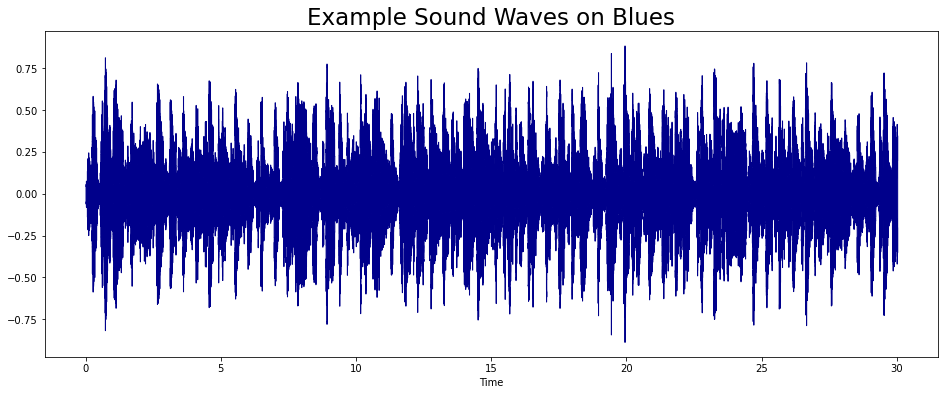

In [6]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = vector, sr = frequency, color = "#00008B");
plt.title("Example Sound Waves on Blues", fontsize = 23);

# Loading the Dataset - (format `.csv`)

<img src="img/img6.png" alt="Alternative text" />


In [7]:
df = pd.read_csv('dataset/text_format/dataset.csv') 

In [8]:
df.head(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
5,blues.00000.5.wav,66149,0.376670,0.089702,0.132618,0.003583,1994.915219,211700.619569,2152.767854,74263.873102,...,31.448069,-3.448373,34.284130,-0.416165,40.791092,-3.649625,32.457901,3.025218,28.892687,blues
6,blues.00000.6.wav,66149,0.379909,0.088827,0.130335,0.003166,1962.150096,177443.070045,2146.503479,98020.541422,...,33.954071,-2.068194,25.623655,1.428141,47.957699,-3.267124,39.382240,3.276939,25.999132,blues
7,blues.00000.7.wav,66149,0.331880,0.092119,0.140600,0.002546,1701.890924,35678.130616,1979.387612,36670.725886,...,38.456211,-3.637886,24.530296,-0.105148,26.716150,-2.016985,23.150423,0.210787,42.512966,blues
8,blues.00000.8.wav,66149,0.347877,0.094209,0.133130,0.002538,1746.473502,138073.931244,1887.619723,117069.920049,...,44.311455,-4.370029,29.873167,2.114592,33.843155,-2.264663,80.812393,3.758598,97.618835,blues
9,blues.00000.9.wav,66149,0.358061,0.082957,0.115312,0.001846,1763.948942,61493.423121,1874.195710,51944.921435,...,43.967834,-3.448304,48.671944,0.099792,41.839546,-7.677177,96.253654,0.791776,40.416420,blues


# EDA and Data Processing 

In [9]:
df['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [10]:
df['label'] = df['label'].astype('category')
df['class_label'] = df['label'].cat.codes

In [11]:
lookup_genre_name = dict(zip(df.class_label.unique(), df.label.unique()))   
lookup_genre_name

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [12]:
df.iloc[:,:] # Contains `Song name`, `Features` and `Class Lable` 

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,class_label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues,0
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues,0
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues,0
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues,0
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock,9
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock,9
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock,9
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock,9


In [13]:
df.iloc[:,1:59]   # Contains ONLY `Features` 

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,5.773784,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,2.074155,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,-1.005473,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,4.123402,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750


# Data Splitting for Training and Testing

In [14]:
X = df.iloc[:,1:59]
y = df['class_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=3)

# Min-Max Normalization

In [15]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

# k-nearest neighbors

For more details, you may like to read ["k-Nearest Neighbour and Amazon SageMaker"](https://dev.to/aws/k-nearest-neighbour-and-amazon-sagemaker-475j)

### How its works basically ? 

<img src="img/KNN-Classification.gif" alt="Alternative text" />


### What that `k` actually means ? 

<img src="img/img7.jpeg" alt="Alternative text" />


In [16]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.8918918918918919

# Predicting using k-NN

In [17]:
df_test = pd.read_csv("dataset/text_format/test.csv")

# Actual Class labels 
actual_class_test_data = df_test['label']

In [18]:
df_test = df_test.iloc[:,1:59]
df_test_transformed = scaler.transform(df_test)

df_test

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.486699,0.066323,0.234727,0.001595,1740.667884,113724.167621,1935.608608,79310.377406,3921.610389,...,-3.219547,20.711342,-8.413791,14.059444,-4.810268,19.807489,2.288020,21.854403,1.290323,20.171120
1,66149,0.341513,0.079160,0.122109,0.001536,1974.523484,200110.595058,2151.858131,31367.054663,4394.926758,...,6.289132,30.436462,-7.773132,21.414705,2.191278,26.675306,-9.681333,30.113859,2.701361,25.367887
2,66149,0.330845,0.086717,0.113215,0.000417,2649.256516,438344.971101,2629.295823,74767.290073,5791.437800,...,-1.071058,52.290680,-10.411189,79.402267,-8.937288,56.151703,-13.634200,90.315971,-9.577728,85.783234
3,66149,0.206763,0.086897,0.041303,0.000114,936.044544,161777.020251,1290.788678,80409.480101,1470.386493,...,-24.847143,56.342182,-14.441087,51.030838,-5.463580,108.629372,-4.259989,176.608841,-6.118605,181.919174
4,66149,0.253980,0.105899,0.202285,0.002464,1074.972910,66369.915084,1286.357019,52678.784296,1767.461877,...,-8.087853,24.482523,-9.257255,38.106785,-7.301809,41.538906,-3.215521,25.158508,-9.646087,21.063032


In [19]:
genre_predictions = knn.predict(df_test_transformed)

In [20]:
print("***************")
print(f"Actual class")
print("***************")
for actual_class in actual_class_test_data.values:
    print(actual_class)
    

print("***************")
print(f"Predicted class")
print("***************")
for predicted_class in genre_predictions:
    print(lookup_genre_name[predicted_class])

***************
Actual class
***************
metal
disco
country
blues
country
***************
Predicted class
***************
metal
disco
country
blues
country


# Saving the model

In [28]:
import pickle
pick1 = {
    'norma':scaler,
    'svmp':knn,
    'lgn':lookup_genre_name
}
pickle.dump( pick1, open( 'model/models' + ".p", "wb" ) )

# I am `DONE`, now back to you my friend !! 

<img src="img/1.gif" alt="Alternative text" />


## Upload to Amazon S3


In [29]:
import boto3
import warnings
warnings.filterwarnings('ignore')

region = boto3.Session().region_name

bucket = "mybucket-reinvent-2022-boa322-musicml"
prefix = "model/models.p"

s3 = boto3.client("s3")
s3.upload_file('model/models.p', bucket, prefix)

print(f"Your model has been sucessfully uploaded to s3://{bucket}/{prefix}")

Your model has been sucessfully uploaded to s3://mybucket-reinvent-2022-boa322-musicml/model/models.p


# Load the model and perform the inference 

In [31]:
import pickle
loaded_model_artifacts = pickle.load(open('model/models.p', 'rb'))
loaded_model_artifacts

{'norma': MinMaxScaler(),
 'svmp': KNeighborsClassifier(),
 'lgn': {0: 'blues',
  1: 'classical',
  2: 'country',
  3: 'disco',
  4: 'hiphop',
  5: 'jazz',
  6: 'metal',
  7: 'pop',
  8: 'reggae',
  9: 'rock'}}

In [32]:
knn = loaded_model_artifacts['svmp']
scaler = loaded_model_artifacts['norma']
lookup_genre_name = loaded_model_artifacts['lgn']

In [33]:
df_test = pd.read_csv("dataset/text_format/test.csv")

# Actual Class labels 
actual_class_test_data = df_test['label']

# Test data 
df_test = df_test.iloc[:,1:59]
df_test_transformed = scaler.transform(df_test)


In [34]:
print("***************")
print(f"Actual class")
print("***************")
for actual_class in actual_class_test_data.values:
    print(actual_class)
    

print("***************")
print(f"Predicted class")
print("***************")
for predicted_class in genre_predictions:
    print(lookup_genre_name[predicted_class])

***************
Actual class
***************
metal
disco
country
blues
country
***************
Predicted class
***************
metal
disco
country
blues
country
